In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
# import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy


In [2]:
DF = pd.read_csv('../dataset/25k IMDb movie Dataset.csv')
DF['Generes'] = DF['Generes'].apply(literal_eval)
l = len(DF)
DF.dropna(subset=['movie title','Generes', 'Overview'],inplace=True)
print('Dropping {} rows for null values'.format(l-len(DF)))


Dropping 244 rows for null values


In [17]:
# load spacy model
# nlp = spacy.load('en_core_web_trf',disable=["tok2vec", "lemmatizer", "tagger", "parser", "ner"])
nlp = spacy.load('en_core_web_md',disable=["lemmatizer", "tagger", "parser", "ner"])

In [18]:
nlp(DF['Overview']).vector

array([-7.15286434e-01,  1.50159001e-01, -3.82413231e-02, -6.14585578e-02,
       -8.49802718e-02, -1.03605688e-01, -1.07566468e-01,  7.42619708e-02,
        4.06193584e-02,  2.12966895e+00, -2.35867351e-01, -1.04044601e-01,
        2.66175605e-02,  2.32709982e-02, -1.52928978e-01, -5.54403253e-02,
       -4.88821417e-02,  8.60836804e-01, -1.82898805e-01,  2.69164536e-02,
       -1.11148059e-01, -1.88807193e-02,  3.25661078e-02, -1.50020778e-01,
       -1.10690042e-01, -6.88232780e-02, -1.34264112e-01,  9.67757776e-02,
       -4.86420728e-02, -1.18638709e-01, -7.13014826e-02,  9.20319743e-03,
       -8.05772394e-02, -6.85615614e-02,  1.92299277e-01,  7.49235228e-02,
       -4.41373549e-02,  6.15791790e-03,  3.38061638e-02,  4.25518379e-02,
       -9.19849277e-02, -3.25631537e-02,  1.66780487e-01, -6.85291588e-02,
        3.39711979e-02, -5.64226806e-02, -5.75884469e-02,  5.70872724e-02,
        9.97459888e-03,  9.77175608e-02,  7.43782446e-02, -4.06935327e-02,
        1.21654747e-02,  

In [19]:
%%time
transformed_overview = DF['Overview'].apply(lambda p:nlp(p).vector)

CPU times: total: 1min 26s
Wall time: 3min 57s


In [39]:
import pickle
with open('../dataset/encoded_overview_md.pkl', "wb") as f:
    pickle.dump(transformed_overview, f)

In [11]:
# import pickle
# with open('../dataset/encoded_overview.pkl', "wb") as f:
#     pickle.dump(transformed_overview, f)

In [ ]:
with open('../dataset/encoded_overview_md.pkl', "rb") as f:
    transformed_overview = pickle.load(f)

In [38]:
transformed_overview = np.stack(transformed_overview.values)

In [ ]:
# load spacy model
nlp = spacy.load('en_core_web_trf',disable=["tok2vec", "lemmatizer", "tagger", "parser", "ner"])
ENCODED_OVERVIEW_PATH = 'encoded_overview.pkl'
transformed_overview = []
if os.path.exists(ENCODED_OVERVIEW_PATH):
    with open(ENCODED_OVERVIEW_PATH, "rb") as f:
        transformed_overview = pickle.load(f)
if transformed_overview.shape[0] != len(DF):
    transformed_overview = DF['Overview'].apply(lambda p:nlp(p).vector)
    with open(ENCODED_OVERVIEW_PATH, "wb") as f:
        pickle.dump(transformed_overview, f)


In [6]:
GENRES = DF['Generes'].explode().unique().tolist()
genre_series = DF['Generes'].apply(' '.join)
genre_vectorizer = CountVectorizer()
genre_vectorizer.fit(GENRES)
transformed_genres = genre_vectorizer.transform(genre_series)

In [16]:
input_list = ['action', 'adult']
transformed_il = genre_vectorizer.transform([' '.join(input_list)])
similarity_scores = cosine_similarity(transformed_il, transformed_genres).reshape((-1))        

In [24]:
np.argsort(similarity_scores.reshape((-1)))

array([12200, 16258, 16257, ...,  6140,  6171,  5605], dtype=int64)

In [28]:
np.argsort(similarity_scores.reshape((-1)))[::-1]

array([ 5605,  6171,  6140, ..., 16257, 16258, 12200], dtype=int64)

In [43]:
a = np.array((range(1,10)))
a[-2:][::-1]

array([9, 8])

In [44]:
DF.iloc[np.argsort(similarity_scores.reshape((-1)))[::-1],:]

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
5605,Pit Fighter,1 hour 23 minutes,4.3,1.2K,[Action],"Jack Severino has no memory, all he knows is t...","['dog fighting', 'pit fighter', 'wrestling', '...",Jesse V. Johnson,"['Dominiquie Vandenberg', 'Steven Bauer', 'Fer...",Jesse V. Johnson,-2005,/title/tt0396096/
6171,Ken Arok - Ken Dedes,not-released,7.5,21,[Action],A traditional Javanese story based on historic...,[],Djun Saptohadi,"['Wiyono Soewardjo', 'Bram Adrianto', 'Baron A...",Djoko S. Koesdiman,-1983,/title/tt1729204/
6140,Kilabot sa Makiling,not-released,no-rating,0,[Action],NaN,[],Armando Garces,"['Cecilio V. Pamintuan', 'Jose L. Santos', 'Ma...",Bert R. Mendoza,-1959,/title/tt0370847/
2845,I Am Vengeance: Retaliation,not-released,3.4,2.9K,[Action],Former special-forces soldier John Gold is giv...,"['sleeper hold', 'woman knocks out man', 'sold...",Ross Boyask,"['Stu Bennett', 'Vinnie Jones', 'Jacob Anderto...",Ross Boyask,-2020,/title/tt8972556/
1941,Blind War,not-released,6.7,44,[Action],The film tells the story of the former SWAT ca...,['mission'],Suiqiang Huo,"['Pingqing Chen', 'Dao Dao', 'Waise Lee', 'Sui...",Laogou Lin,-2022,/title/tt17909448/
...,...,...,...,...,...,...,...,...,...,...,...,...
16255,Bill & Ted's Bogus Journey,"$20,000,000 (estimated)",6.3,76K,"[Adventure, Comedy, Fantasy]",A tyrant from the future creates evil android ...,"['musician', 'death character', 'time machine'...",Peter Hewitt,"['Ed Solomon', 'Keanu Reeves', 'Alex Winter', ...",Chris Matheson,-1991,/title/tt0101452/
16256,Surf's Up,"$100,000,000 (estimated)",6.7,79K,"[Animation, Adventure, Comedy]",A behind-the-scenes look at the annual Penguin...,"['anthropomorphic penguin', 'surfing', 'pengui...",Ash Brannon,"['Don Rhymer', 'Ash Brannon', 'Chris Buck', 'S...",Chris Buck,-2007,/title/tt0423294/
16257,Major Payne,1 hour 35 minutes,6.2,35K,"[Adventure, Comedy, Family]",A recently discharged Major finds himself comm...,"['drill instructor', 'german shepherd dog', 'c...",Nick Castle,"['Bob Mosher', 'William Roberts', 'Damon Wayan...",Joe Connelly,-1995,/title/tt0110443/
16258,The Muppets,"$45,000,000 (estimated)",7.1,92K,"[Adventure, Comedy, Family]",A Muppet fanatic with some help from his 2 hum...,"['nightmare', 'charlie chaplin character', 'mi...",James Bobin,"['Nicholas Stoller', 'Jim Henson', 'Amy Adams'...",Jason Segel,-2011,/title/tt1204342/


In [15]:
np.argsort()

'action adult'

In [47]:
title = 'The Muppets'

In [53]:
input_row = DF[DF['movie title'] == title]
input_overview = input_row['Overview']
ignore_idx = input_row.index

In [56]:
ignore_idx.values[0]

16258

In [52]:
input_overview

Series([], Name: Overview, dtype: object)

In [72]:
for i,row in DF.iterrows():
    if type(row['Overview']) != str:
        if row['Run Time'] != 'not-released':
            print(row)
            print(type(row['Overview']))
            print(row['Overview'])

movie title                                               Varayan
Run Time                                       2 hours 23 minutes
Rating                                                        9.2
User Rating                                                   765
Generes                                           [Action, Drama]
Overview                                                      NaN
Plot Kyeword                                                   []
Director                                              Jijo Joseph
Top 5 Casts     ['Leona Lishoy', 'Siju Wilson', 'Jude Anthany ...
Writer                                             Danny Capuchin
year                                                        -2022
path                                           /title/tt11623854/
Name: 4239, dtype: object
<class 'float'>
nan
movie title                               Instruments of Darkness
Run Time                                                    Color
Rating                        

In [70]:
DF[DF['Overview'] == np.nan]

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path


In [57]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# load spacy model
nlp = spacy.load('en_core_web_md')


In [59]:
def over_nlp(p):
    try:
        return nlp(p).vector
    except:
        print(p)
        
transformed_overview = DF['Overview'].apply(over_nlp)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


## Ideas

Genre - vectorize genres

overview - Use bert for txt similarity or spacy sentence encoding



In [ ]:
df['Plot Kyeword'].sample(10).values

In [ ]:
df['Generes'].values.flatten()

In [ ]:
df['Generes'].apply(literal_eval).explode().unique().tolist()

In [ ]:
import re

string = "(1) (2022)."
pattern = r"\b\d{4}\b"
year = re.findall(pattern, string)[0]
print(year)

In [ ]:
df['movie title'].unique().tolist()

# EDA

In [5]:
df = DF

In [6]:
df.columns

Index(['movie title', 'Run Time', 'Rating', 'User Rating', 'Generes',
       'Overview', 'Plot Kyeword', 'Director', 'Top 5 Casts', 'Writer', 'year',
       'path'],
      dtype='object')

<Axes: >

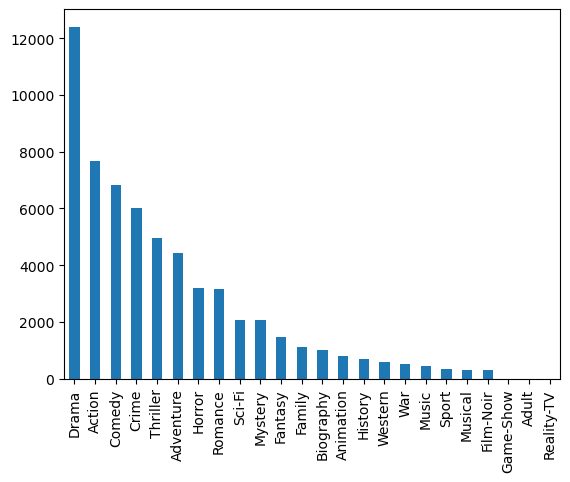

In [7]:
df['Generes'].explode().value_counts().plot(kind='bar')

In [8]:
df['Plot Kyeword'] = df['Plot Kyeword'].apply(literal_eval)
# .explode().value_counts().plot(kind='bar')

<Axes: >

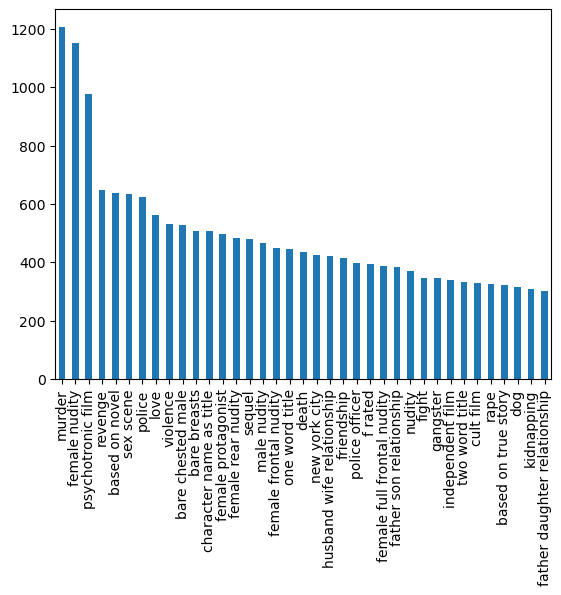

In [13]:
vc = df['Plot Kyeword'].explode().value_counts()
vc[vc > 300].plot(kind='bar')

In [89]:
import re

# year processing
def year_func(inp):
    pattern = r"\b\d{4}\b"
    if type(inp) == str:
        y = re.findall(pattern, inp)
        if len(y) > 0:
            return y[0]
    return '0000'

vc = df['year'].apply(year_func).value_counts()


In [90]:
vc = vc[vc.index != '0000']

In [91]:
vc.index = pd.to_datetime(vc.index)

In [92]:
vc.sort_index(ascending=True,inplace=True)

In [93]:
vc

1906-01-01     1
1913-01-01     1
1914-01-01     4
1915-01-01     3
1916-01-01     1
              ..
2024-01-01    17
2025-01-01    13
2026-01-01     3
2027-01-01     5
2028-01-01     2
Name: year, Length: 116, dtype: int64

Text(0, 0.5, 'Number of Movies Released')

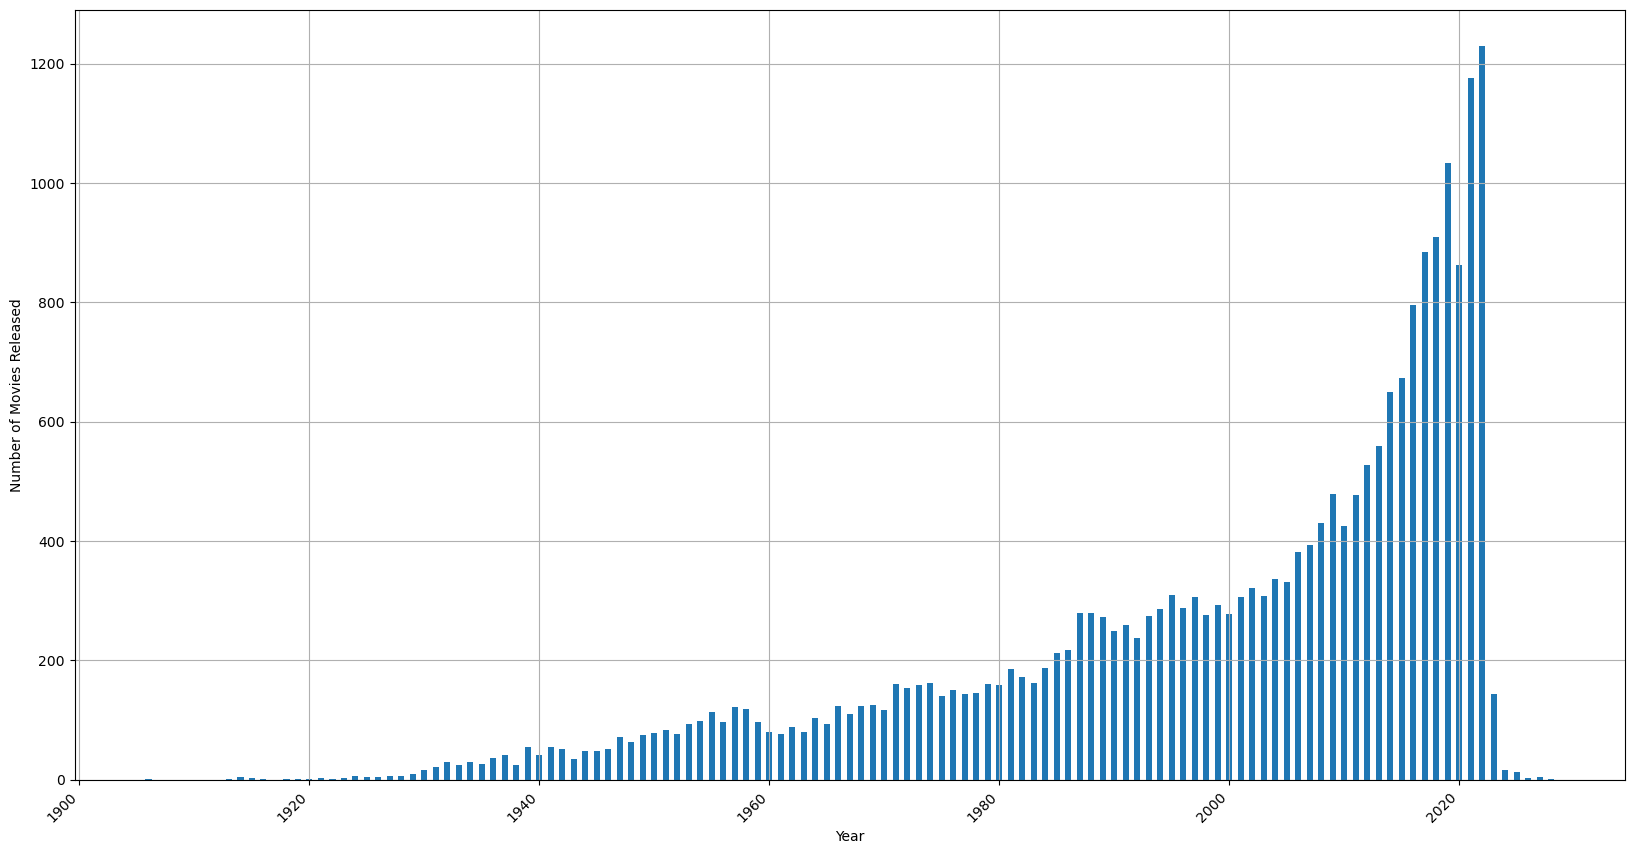

In [99]:
fig = plt.figure(figsize=(20, 10))
plt.bar(vc.index,vc.values,200)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')